### Cirq Tutorial

https://quantumai.google/cirq/start/basics

In [35]:
# Cirq Tutorial for Qiskit Users

# # Introduction
# In this notebook, we will explore Cirq, a Python library for designing, simulating, and running quantum circuits. 
# If you are familiar with Qiskit, you will notice some similarities as well as key differences. This tutorial 
# starts from the basics and builds up to more advanced concepts.

# ## Install Cirq
# If you do not already have Cirq installed, you can install it using pip:
# ```bash
# pip install cirq
# ```


In [36]:

# ## Import Cirq
# Let's start by importing the library.
import cirq


In [37]:

# ## 1. Creating Qubits
# Cirq uses the `cirq.NamedQubit` or `cirq.LineQubit` classes to represent qubits.
# For simplicity, let's start by creating a single qubit.

# Create a single qubit
qubit = cirq.NamedQubit("q1")
print(f"Created qubit: {qubit}")


Created qubit: q1


In [38]:
# We can also create multiple qubits at once using `cirq.LineQubit`.
# Line qubits can be created individually
q3 = cirq.LineQubit(3)
print(f"Created individual qubit: {q3}")

# Or created in a range
# This will create LineQubit(0), LineQubit(1), LineQubit(2)
q0, q1, q2 = cirq.LineQubit.range(3)
print(f"Created range of qubits: {q0}, {q1}, {q2}")

# Or stored as a list
qubits = cirq.LineQubit.range(5)
print(f"Created qubits: {qubits}")

Created individual qubit: q(3)
Created range of qubits: q(0), q(1), q(2)
Created qubits: [cirq.LineQubit(0), cirq.LineQubit(1), cirq.LineQubit(2), cirq.LineQubit(3), cirq.LineQubit(4)]


In [39]:
# We can even have qbits in a grid
# Grid Qubits can also be referenced individually
q4_5 = cirq.GridQubit(4, 5)
print(f"Created individual qubit: {q4_5}")

# Or created in bulk in a square
# This will create 16 qubits from (0,0) to (3,3)
qubits = cirq.GridQubit.square(4)
print(f"Created qubits: {qubits}")

Created individual qubit: q(4, 5)
Created qubits: [cirq.GridQubit(0, 0), cirq.GridQubit(0, 1), cirq.GridQubit(0, 2), cirq.GridQubit(0, 3), cirq.GridQubit(1, 0), cirq.GridQubit(1, 1), cirq.GridQubit(1, 2), cirq.GridQubit(1, 3), cirq.GridQubit(2, 0), cirq.GridQubit(2, 1), cirq.GridQubit(2, 2), cirq.GridQubit(2, 3), cirq.GridQubit(3, 0), cirq.GridQubit(3, 1), cirq.GridQubit(3, 2), cirq.GridQubit(3, 3)]


In [40]:

# ## 2. Building a Circuit
# A quantum circuit in Cirq is constructed using the `cirq.Circuit` class. You can add gates to the circuit in a sequential manner.

# Create a basic circuit
circuit = cirq.Circuit()

# Add a Hadamard gate
circuit.append(cirq.H(qubit))

# Add a measurement operation
circuit.append(cirq.measure(qubit, key="result"))

print("Circuit:")
print(circuit)


Circuit:
q1: ───H───M('result')───


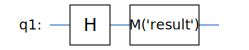

In [41]:
# ## 6. Visualizing Circuits
# Cirq allows you to visualize circuits using a simple text-based representation. However, for graphical visualization, external tools  are required, unlike Qiskit which has built-in visualization capabilities.

# Plotting the previous circuit
from cirq.contrib.svg import SVGCircuit

# Convert Cirq circuit to a diagram
SVGCircuit(circuit)



Single-qubit gates:


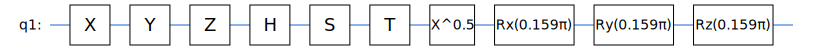

In [42]:
# Circuits, as in qiskit, use gates to perform operations on qubits. Cirq provides a wide range of gates, including single-qubit gates and multi-qubit gates. Here are some examples:
# https://quantumai.google/cirq/build/gates

# Single-qubit gates
circuit = cirq.Circuit()
# Pauli gates
circuit.append(cirq.X(qubit))
circuit.append(cirq.Y(qubit))
circuit.append(cirq.Z(qubit))
# Clifford gates
circuit.append(cirq.H(qubit))
circuit.append(cirq.S(qubit))
circuit.append(cirq.T(qubit))
# Square root of X
circuit.append(cirq.X(qubit)**0.5)
# Rotation gates
circuit.append(cirq.rx(0.5)(qubit))
circuit.append(cirq.ry(0.5)(qubit))
circuit.append(cirq.rz(0.5)(qubit))

print("Single-qubit gates:")
SVGCircuit(circuit)


2-qubit gates:


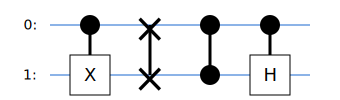

In [62]:
# 2-qubit gates
circuit = cirq.Circuit()
# CNOT gate
circuit.append(cirq.CNOT(q0, q1))
# SWAP gate
circuit.append(cirq.SWAP(q0, q1))
# Controlled-Z gate
circuit.append(cirq.CZ(q0, q1))
# Controlled-H gate
circuit.append(cirq.ControlledGate(cirq.H, num_controls=1)(q0, q1))

print("2-qubit gates:")
SVGCircuit(circuit)

3-qubit gates:


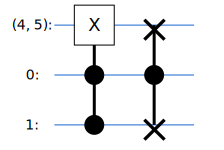

In [63]:
# And Cirq even has 3-qubit gates
circuit = cirq.Circuit()
# Toffoli gate
circuit.append(cirq.TOFFOLI(q0, q1, q2))
# Fredkin gate
circuit.append(cirq.FREDKIN(q0, q1, q2))

print("3-qubit gates:")
SVGCircuit(circuit)

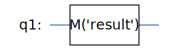

In [44]:
# Finally, to measure a qubit, we can use the `cirq.measure` function.
circuit = cirq.Circuit()
circuit.append(cirq.measure(qubit, key="result"))
SVGCircuit(circuit)

In [45]:
# Devices
# Cirq also has preloaded configurations to simulate real devices. For example, the `cirq_google.Sycamore` device simulates the Google Sycamore processor.
import cirq_google
print(cirq_google.Sycamore)

                                             (0, 5)───(0, 6)
                                             │        │
                                             │        │
                                    (1, 4)───(1, 5)───(1, 6)───(1, 7)
                                    │        │        │        │
                                    │        │        │        │
                           (2, 3)───(2, 4)───(2, 5)───(2, 6)───(2, 7)───(2, 8)
                           │        │        │        │        │        │
                           │        │        │        │        │        │
                  (3, 2)───(3, 3)───(3, 4)───(3, 5)───(3, 6)───(3, 7)───(3, 8)───(3, 9)
                  │        │        │        │        │        │        │        │
                  │        │        │        │        │        │        │        │
         (4, 1)───(4, 2)───(4, 3)───(4, 4)───(4, 5)───(4, 6)───(4, 7)───(4, 8)───(4, 9)
         │        │        │        │        │        │   

In [46]:
# These devices may have rel-life constraints, such as connectivity, gate times, and error rates. These constraints can be taken into account when designing circuits.
# For example, this Sycamore device has a connectivity graph that defines which qubits can interact with each other, as shown above. Only adjacent qubits can be entangled.
# Lets see what happens when we try to make an operation between non-adjacent qubits.
# Create some qubits.
q0 = cirq.GridQubit(5, 6)
q1 = cirq.GridQubit(5, 5)
q2 = cirq.GridQubit(4, 5)

# Create operations using the Sycamore gate, which is supported by the Sycamore device.
# However, create operations for both adjacent and non-adjacent qubit pairs.
adjacent_op = cirq_google.SYC(q0, q1)
nonadjacent_op = cirq_google.SYC(q0, q2)

# A working circuit for the Sycamore device raises no issues.
working_circuit = cirq.Circuit()
working_circuit.append(adjacent_op)
valid = cirq_google.Sycamore.validate_circuit(working_circuit)
print(f"Valid circuit with adjacent qubits: {valid}")

# A circuit using invalid operations.
bad_circuit = cirq.Circuit()
bad_circuit.append(nonadjacent_op)
try:
    cirq_google.Sycamore.validate_circuit(bad_circuit)
except ValueError as e:
    print("But an invalid circuit raises an error.")
    print(e)


Valid circuit with adjacent qubits: None
But an invalid circuit raises an error.
Qubit pair is not valid on device: (cirq.GridQubit(5, 6), cirq.GridQubit(4, 5)).


In [47]:

# ## 3. Simulating a Circuit
# To simulate the circuit, we use the `cirq.Simulator` class. This is similar to Qiskit's Aer simulator.

# Create a simulator
simulator = cirq.Simulator()

# Run the simulation
result = simulator.run(circuit, repetitions=10)

print("Simulation results:")
print(result)


Simulation results:
result=0000000000


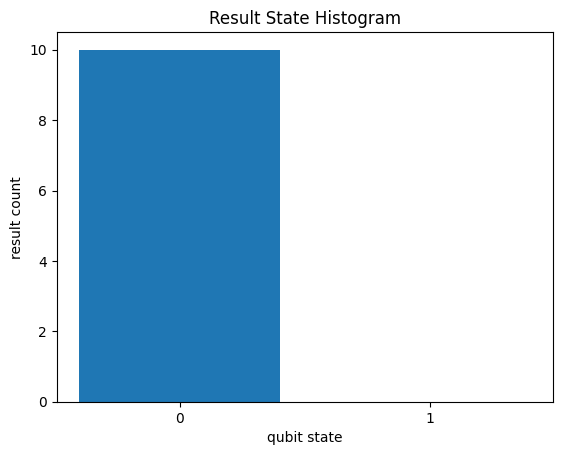

In [48]:
## Visualizing the results
# Cirq provides a simple way to visualize the results of the simulation.
# We will use matplotlib for this purpose.

import matplotlib.pyplot as plt

# Plot the histogram of results
cirq.plot_state_histogram(result, plt.subplot())
plt.show()

Bell state circuit:
0: ───H───@───M('result')───
          │   │
1: ───────X───M─────────────


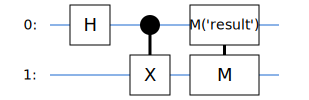

In [49]:

# ## 4. Multi-Qubit Circuits
# Cirq also supports multi-qubit circuits. Let's create a 2-qubit Bell state circuit.

# Create two qubits
q0, q1 = cirq.LineQubit.range(2)

# Build a Bell state circuit
bell_circuit = cirq.Circuit(
    cirq.H(q0),  # Apply Hadamard gate
    cirq.CNOT(q0, q1),  # Apply CNOT gate
    cirq.measure(q0, q1, key="result"),  # Measure both qubits
)

print("Bell state circuit:")
print(bell_circuit)

# Or again, visualize the circuit
SVGCircuit(bell_circuit)


Bell state simulation results:
result=11111100000101010101000011001101111001101011000011001111100000011110111001001111011000011110011010111010011101011101101010110000110010011001010010001000001101110011000111111010011101110011101010111100001110001001101011010001011011111101001101001010101011001011100000100110111101010001101011010101101110001100000110111110011001000010001101110011101110111000100110001110100110000101100001010111010110111101100100010100010011010101100001110011111000010110011001011011001010111111100010111011011011001001101100100000011101011100001000111010101001000101000110101110000010000000000000100010101101000101000110110001001101100110011100000001110100000100001000110101100001000110111100011111000010001010011101101010000100000101110010010101010111110111010101101110111011110101000110100100001110000011000100101010000101111100011001001111101110000010010110010001011101110001111001010001110010001000011101000011000100111000000001001111010111110110011101010011101101010101110100

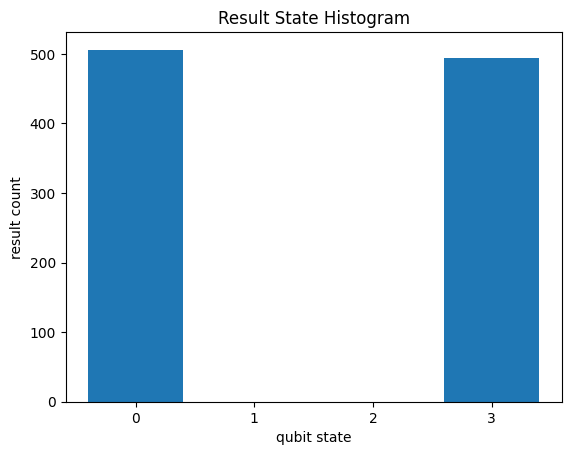

In [50]:

# Simulate the Bell state circuit
bell_result = simulator.run(bell_circuit, repetitions=1000)

print("Bell state simulation results:")
print(bell_result)

# Plot the histogram of results
cirq.plot_state_histogram(bell_result, plt.subplot())
plt.show()


Counter({0: 506, 3: 494})


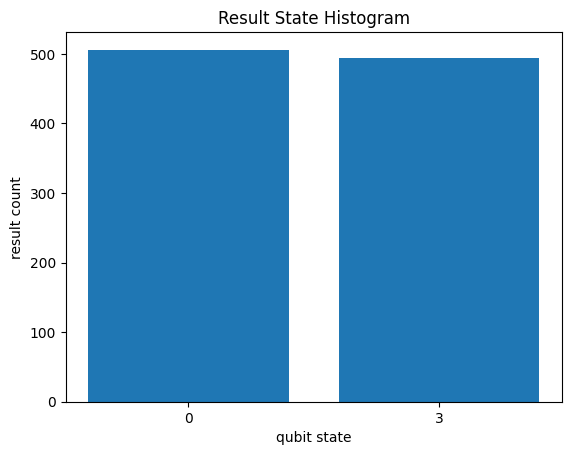

In [56]:
# We can also simplify it to not display empty results by getting counts
counts = bell_result.histogram(key='result')
print(counts)

# Graph the histogram counts instead of the results
cirq.plot_state_histogram(counts, plt.subplot())
plt.show()

In [ ]:

# ## 7. Advanced Features
# Cirq provides advanced functionality, such as:
# - **Parameter Sweeps:** Executing circuits with varying parameters.
# - **Unitary Matrices:** Computing the unitary matrix of a circuit.
# - **Decompositions:** Decomposing a circuit into simpler gates.


In [ ]:

# Parameter sweeps


Once the circuit is complete, you can fill in the possible values of each of these parameters with a `Sweep`.  There are several possibilities that can be used as a sweep:

*   `cirq.Points`: A list of manually specified values for one specific symbol as a sequence of floats.
*   `cirq.Linspace`: A linear sweep from a starting value to an ending value.
*   `cirq.ListSweep`: A list of manually specified values for several different symbols, specified as a list of dictionaries.
*   `cirq.Zip` and `cirq.Product`: Sweeps can be combined list-wise by zipping them together or through their Cartesian product.

A parameterized circuit and sweep together can be run using the simulator or other sampler by changing `run()` to `run_sweep()` and adding the sweep as a parameter.

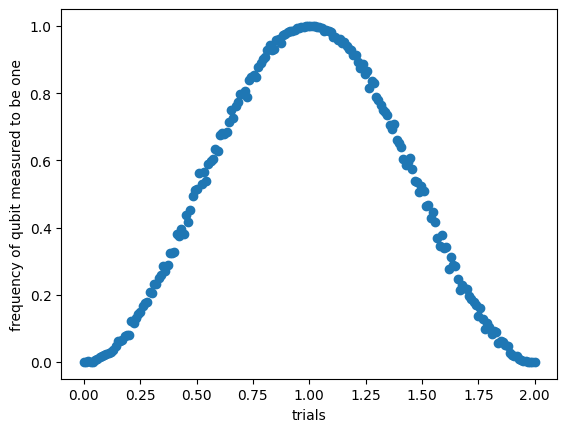

In [57]:

# Here is an example of sweeping an exponent of a X gate:
import sympy

# Perform an X gate with variable exponent
q = cirq.GridQubit(1, 1)
circuit = cirq.Circuit(cirq.X(q) ** sympy.Symbol('t'), cirq.measure(q, key='m'))

# Sweep exponent from zero (off) to one (on) and back to two (off)
param_sweep = cirq.Linspace('t', start=0, stop=2, length=200)

# Simulate the sweep
s = cirq.Simulator()
trials = s.run_sweep(circuit, param_sweep, repetitions=1000)

# Plot all the results
x_data = [trial.params['t'] for trial in trials]
y_data = [trial.histogram(key='m')[1] / 1000.0 for trial in trials]
plt.scatter('t', 'p', data={'t': x_data, 'p': y_data})
plt.xlabel("trials")
plt.ylabel("frequency of qubit measured to be one")
plt.show()

In [58]:
# Unitary matrices
# Cirq also allows you to create unitary matrices from circuits.
print('Unitary of the X gate')
print(cirq.unitary(cirq.X))

print('Unitary of SWAP operator on two qubits.')
q0, q1 = cirq.LineQubit.range(2)
print(cirq.unitary(cirq.SWAP(q0, q1)))

print('Unitary of a sample circuit')
print(cirq.unitary(cirq.Circuit(cirq.X(q0), cirq.SWAP(q0, q1))))

Unitary of the X gate
[[0.+0.j 1.+0.j]
 [1.+0.j 0.+0.j]]
Unitary of SWAP operator on two qubits.
[[1.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 1.+0.j 0.+0.j]
 [0.+0.j 1.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 1.+0.j]]
Unitary of a sample circuit
[[0.+0.j 0.+0.j 1.+0.j 0.+0.j]
 [1.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 1.+0.j]
 [0.+0.j 1.+0.j 0.+0.j 0.+0.j]]


In [59]:
# Decompositions
# Cirq can also decompose circuits into simpler gates.

# For example, let's decompose a Hadamard gate into simpler gates.
print(cirq.decompose(cirq.H(cirq.LineQubit(0))))

[(cirq.Y**0.5).on(cirq.LineQubit(0)), cirq.XPowGate(global_shift=-0.25).on(cirq.LineQubit(0))]


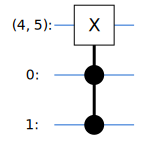

Decomposed:


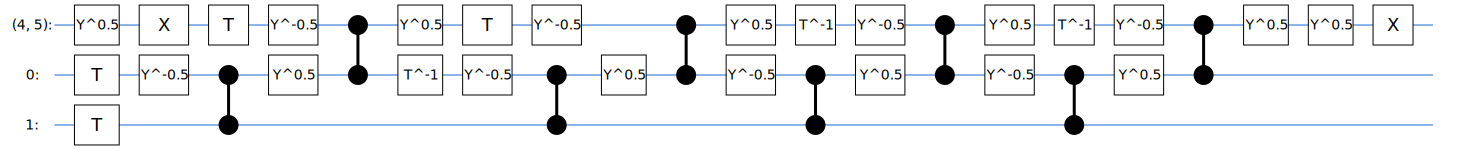

In [67]:
# It is specially interesting for 3-qubit gates since most quantum computers only support 1 and 2-qubit gates.
display(SVGCircuit(cirq.Circuit(cirq.TOFFOLI(q0, q1, q2))))
print("Decomposed:")
SVGCircuit(cirq.Circuit(cirq.decompose(cirq.TOFFOLI(q0, q1, q2))))

In [68]:
# Just for curiosity, this is the unitary of the Toffoli gate
print(cirq.unitary(cirq.TOFFOLI))

[[1.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 1.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 1.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 1.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j 1.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 1.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 1.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 1.+0.j 0.+0.j]]


In [71]:
# Transformers
# Transformers are used to modify circuits. For example, we can combine or optimize gates in a circuit.

# For example, let's combine two Hadamard gates into a single gate.
circuit = cirq.Circuit(cirq.H(q0), cirq.H(q0))
print("Original circuit:")
print(circuit)

# Combine Hadamard gates
circuit = cirq.Circuit(cirq.H(q0), cirq.H(q0))
circuit = cirq.HPowGate(exponent=2).on(q0)
print("Combined circuit:")
print(circuit)

# We can combine single-qubit gates into a single gate
# the cirq.merge_single_qubit_gates_to_phxz transformer will take consecutive single-qubit operations and merge them into a single PhasedXZ operation.
q = cirq.GridQubit(1, 1)
c = cirq.Circuit(cirq.X(q) ** 0.25, cirq.Y(q) ** 0.25, cirq.Z(q) ** 0.25)
print("\nOriginal circuit:")
print(c)
c = cirq.merge_single_qubit_gates_to_phxz(c)
print("Merged circuit:")
print(c)


Original circuit:
0: ───H───H───
Combined circuit:
H**2(q(0))

Original circuit:
(1, 1): ───X^0.25───Y^0.25───T───
Merged circuit:
(1, 1): ───PhXZ(a=0.304,x=0.333,z=0.142)───
